# Class Schedule Report

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.pylab as plt
import xlrd
import xlwt
import warnings
warnings.filterwarnings("ignore")

In [121]:

# Importing the class schedule
today = date.today()
df1 = pd.read_excel('5-3-2021-CU_SR_CLASS_ENRL_ALL_2067342122.xlsx', header=1)


In [122]:
# Importing the Business Designation
df2=pd.read_excel('BusinessDesignationLookup.xlsx', header=0)
df2.columns=['Subject', 'Department']


In [123]:
# Merged on subject - Unique id : Subject
df3 = pd.merge(df1, df2, on ='Subject', how ='inner')
df3['Crs']=df3['Subject']+df3['Catalog#']


In [124]:
df4=pd.read_excel('InternshipCourses.xlsx')
df4['Crs']=df4['CoursePrefix']+df4['CourseNumber'].astype(str)
df4=pd.DataFrame(df4['Crs'])


In [125]:
l=df4['Crs'].to_list()
df5=df3.loc[~df3['Crs'].isin(l)]
#df5['Career']=df5['Catalog#'].apply(lambda x: 'GRAD' if x[0] == '9' else 'UG')
#df5['Career']=df5['Catalog#'].apply(lambda x: 'GRAD' if x[0] == '9' else 'UG')
df5.loc[:, ('Career')] = df5.loc[:, ('Catalog#')].apply(lambda x: 'GRAD' if x[0] == '9' else 'UG')


In [126]:
df5.loc[(df5['Subject'] == 'BUS') & ((df5['Catalog#'] == '4093H') | (df5['Catalog#'] == '4111H') | 
                                           (df5['Catalog#'] == '4444H')|
                                           (df5['Catalog#'] == '9601')| (df5['Catalog#'] == '9430')|
                                           (df5['Catalog#'] == '9700')),'Department'] = 'MGT'

In [127]:
#New Excel
df5.to_excel(r'/Users/apurvasharma/Downloads/NewSchedule.xlsx', 
            sheet_name='Schedule_Analysis_Final', index = False)

##  Sections by Mode

In [128]:
#Mode wise split
df_sec_mode= df5.groupby( ["Mode"] ).size().to_frame(name = 'Sections').reset_index()
df_sec_mode['Percentage']=df_sec_mode['Sections']/df_sec_mode['Sections'].sum()
df_sec_mode['Percentage']= pd.Series(["{:,.2%}".format(val) for val in df_sec_mode['Percentage']], index = df_sec_mode.index)
df_sec_mode


,Mode,Sections,Percentage
0,H,187,19.87%
1,O,461,48.99%
2,P,293,31.14%


##  Sections by Mode

<Figure size 720x432 with 0 Axes>

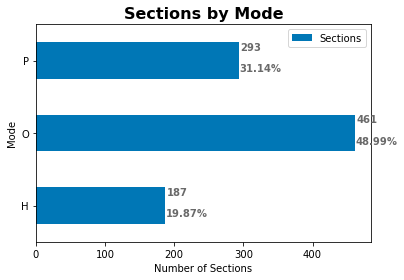

In [129]:
plt.figure(figsize = (10, 6))
ax = df_sec_mode.plot(x='Mode', y='Sections', kind='barh', color = "#0077b6")
ax.set_title('Sections by Mode',fontsize = 16, fontweight = "bold")
ax.set_xlabel('Number of Sections')
ax.set_ylabel('Mode')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+2, i.get_y()+.4, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey',fontweight = "bold")

totals = []
    
for i in ax.patches:
    totals.append(i.get_width())    

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.1, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10, color='dimgrey',fontweight = "bold")

## Department Sections by Mode

In [130]:
# Mode - Department (Section) Split
df_section_department = df5.groupby(['Mode', 'Department']).size().to_frame(name = 'Sections').reset_index()
df_section_department
table_dept = df_section_department.pivot_table(values ='Sections', index = 'Department', columns = 'Mode')
table_dept


Mode,H,O,P
Department,,,
ACC,7.0,77.0,24.0
CIS,40.0,68.0,61.0
FIN,15.0,116.0,24.0
LAW,3.0,17.0,37.0
MGT,90.0,73.0,56.0
MKT,32.0,98.0,75.0
RES,NaN,12.0,16.0


## Department Sections by Mode

<AxesSubplot:xlabel='Department'>

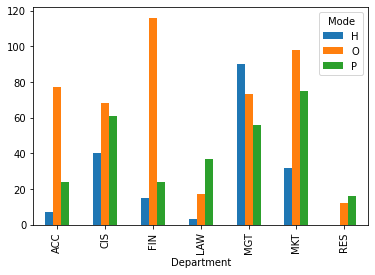

In [131]:
table_dept.plot(kind = 'bar')

## % of Sections of Departments

In [132]:
# Percentage of sections
active_def = pd.pivot_table(df_section_department, index = 'Department', columns= 'Mode', aggfunc= sum, margins=True , fill_value = 0, dropna = True)
active_def_2 = round(active_def.div( active_def.iloc[:,-1], axis=0 )*100,2) 
active_def_2 = active_def_2.iloc[:,:3]
active_def_2

Sections              
Mode              H      O      P
Department                       
ACC            6.48  71.30  22.22
CIS           23.67  40.24  36.09
FIN            9.68  74.84  15.48
LAW            5.26  29.82  64.91
MGT           41.10  33.33  25.57
MKT           15.61  47.80  36.59
RES            0.00  42.86  57.14
All           19.87  48.99  31.14

## % of Sections of Departments

<AxesSubplot:xlabel='Department'>

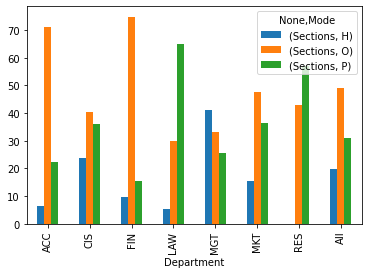

In [133]:

active_def_2.plot(kind = 'bar')

## Section Count

In [134]:
#Section Count
# New column for count
df_c =df5.groupby( [ "Department", "Mode"] ).size().to_frame(name = 'Section').reset_index()
df_c


,Department,Mode,Section
0,ACC,H,7
1,ACC,O,77
2,ACC,P,24
3,CIS,H,40
4,CIS,O,68
5,CIS,P,61
6,FIN,H,15
7,FIN,O,116
8,FIN,P,24
9,LAW,H,3


## Section Strength %


In [135]:
#Sizes of the mode sizes
df_t = df_c.pivot_table(values="Section", index="Department", columns="Mode")
df_t

Mode,H,O,P
Department,,,
ACC,7.0,77.0,24.0
CIS,40.0,68.0,61.0
FIN,15.0,116.0,24.0
LAW,3.0,17.0,37.0
MGT,90.0,73.0,56.0
MKT,32.0,98.0,75.0
RES,NaN,12.0,16.0


## Section Strength %

<AxesSubplot:xlabel='Department'>

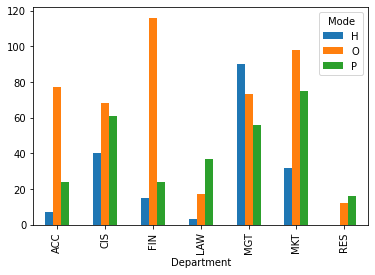

In [136]:
# Plot with mode and department
df_t.plot(kind = 'bar')

## Career  - Class Type (Hybrid,in-Person,Online)

In [137]:
# Career wise split
df_career = df5.groupby( [ "Career", "Mode"] ).size().to_frame(name = 'count').reset_index()
df_career_pivot= df_career.pivot_table(values="count", index="Career", columns="Mode")
df_career_pivot 

Mode,H,O,P
Career,,,
GRAD,35,81,79
UG,152,380,214


## Career  - Class Type (Hybrid,in-Person,Online)

<AxesSubplot:xlabel='Career'>

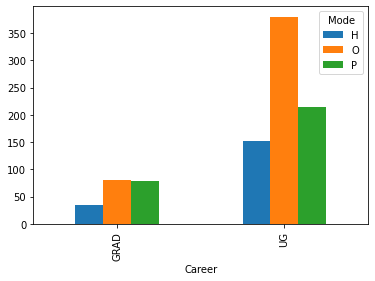

In [138]:
df_career_pivot.plot(kind = 'bar')

In [139]:
#Career - Mode - Department
df_career_department_mode= df5.groupby( [ "Career", "Department",
                                         "Mode"] ).size().to_frame(name = 'Sections').reset_index()
df_career_department_mode

,Career,Department,Mode,Sections
0,GRAD,ACC,O,9
1,GRAD,ACC,P,11
2,GRAD,CIS,H,14
3,GRAD,CIS,O,29
4,GRAD,CIS,P,24
5,GRAD,FIN,H,2
6,GRAD,FIN,O,18
7,GRAD,FIN,P,6
8,GRAD,LAW,O,2
9,GRAD,LAW,P,5


## Undergraduate Class Enrollment

In [140]:
Enrl_UG = df_career_department_mode[df_career_department_mode.Career =='UG']
Enrl_UG

,Career,Department,Mode,Sections
18,UG,ACC,H,7
19,UG,ACC,O,68
20,UG,ACC,P,13
21,UG,CIS,H,26
22,UG,CIS,O,39
23,UG,CIS,P,37
24,UG,FIN,H,13
25,UG,FIN,O,98
26,UG,FIN,P,18
27,UG,LAW,H,3


## Undergraduate Class Enrollment

<AxesSubplot:xlabel='Department', ylabel='Sections'>

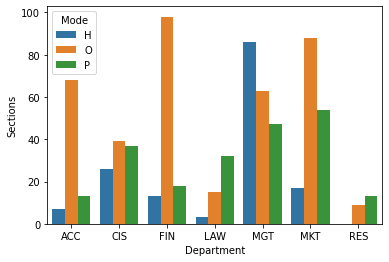

In [141]:
sns.barplot(x='Department',y='Sections',hue='Mode',data=Enrl_UG,ci=None)

## Graduate Class Enrollment

In [142]:
Enrl_G = df_career_department_mode[df_career_department_mode.Career =='GRAD']
Enrl_G

,Career,Department,Mode,Sections
0,GRAD,ACC,O,9
1,GRAD,ACC,P,11
2,GRAD,CIS,H,14
3,GRAD,CIS,O,29
4,GRAD,CIS,P,24
5,GRAD,FIN,H,2
6,GRAD,FIN,O,18
7,GRAD,FIN,P,6
8,GRAD,LAW,O,2
9,GRAD,LAW,P,5


## Graduate Class Enrollment

<AxesSubplot:xlabel='Department', ylabel='Sections'>

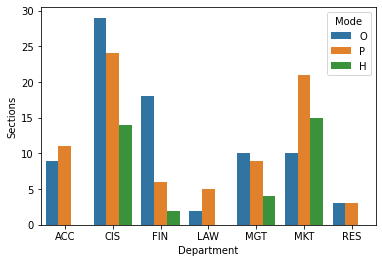

In [143]:
sns.barplot(x='Department',y='Sections',hue='Mode',data=Enrl_G,ci=None)

## UnderGrad and Grad Section Sizes

<AxesSubplot:xlabel='Department', ylabel='Sections'>

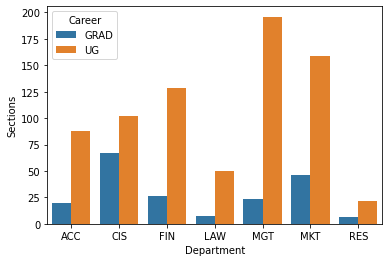

In [144]:
# Section count - Career & Department
df_career_department= df5.groupby( [ "Career", "Department",
                                         ] ).size().to_frame(name = 'Sections').reset_index()
sns.barplot(x='Department',y='Sections',hue='Career',data=df_career_department,ci=None)

## Enrollment Seats Distribution

In [145]:
# Enrollment Split by Grad and UG
Enrollment_Career_mode= df5.groupby( [ "Career", "Mode"] )['Enrl Cap'].agg('sum').to_frame(name = 'Enrollment Cap').reset_index()
Enrollment_Career_mode


,Career,Mode,Enrollment Cap
0,GRAD,H,1690
1,GRAD,O,4518
2,GRAD,P,3861
3,UG,H,7383
4,UG,O,22790
5,UG,P,9162


## Enrollment Seats Distribution

In [146]:
active_enrl_def = pd.pivot_table(Enrollment_Career_mode, index = 'Career',
                                 columns= 'Mode',values = 'Enrollment Cap', aggfunc= sum, 
                                 margins=True, fill_value = 0 , dropna = True)


In [147]:
#split by enrollment seats
active_enrl_def = active_enrl_def.iloc[:,:3]
active_enrl_def
active_enrl_def



Mode,H,O,P
Career,,,
GRAD,1690,4518,3861
UG,7383,22790,9162
All,9073,27308,13023


## Enrollment Seats Distribution

<AxesSubplot:xlabel='Career'>

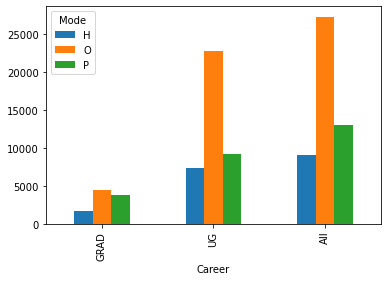

In [148]:
active_enrl_def.plot(kind = 'bar')


## Department - Enrollment Seats

In [213]:
#Tot Enrl - Actual Enrollment ratio
Actual_Erollment_cap= df5.groupby( [ "Career", "Mode", "Department"] )["Tot Enrl","Enrl Cap"].agg('sum').reset_index()
Actual_Erollment_cap
Actual_Erollment_cap_pivot = pd.pivot(Actual_Erollment_cap, index= ['Career','Department'], values = ["Tot Enrl","Enrl Cap"], columns= 'Mode')
#df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)


Tot Enrl                 Enrl Cap                
Mode                     H       O       P        H       O       P
Career Department                                                  
GRAD   ACC             NaN   468.0   291.0      NaN   883.0   871.0
       CIS           219.0   948.0   388.0    695.0  1448.0  1180.0
       FIN            46.0   767.0   170.0    110.0  1028.0   260.0
       LAW             NaN    31.0    65.0      NaN   110.0   285.0
       MGT           126.0   294.0   130.0    235.0   455.0   300.0
       MKT           347.0   253.0   290.0    650.0   474.0   870.0
       RES             NaN    49.0    28.0      NaN   120.0    95.0
UG     ACC           277.0  4064.0   403.0    430.0  5785.0   717.0
       CIS           777.0  1725.0  1032.0   1135.0  2070.0  1770.0
       FIN           367.0  4867.0   668.0    849.0  6661.0  1302.0
       LAW            40.0   295.0   304.0    150.0   670.0  1045.0
       MGT          1638.0  1939.0   897.0   3834.0  2596.0  1977.0
       MKT           720.0  1844.0   422.0    985.0  4518.0  1796.0
       RES             NaN   473.0   163.0      NaN   490.0   555.0

## Enrollment Seats by Mode 

## Vacant Seats

In [201]:
Actual_Erollment_cap['Vacant Seats']=Actual_Erollment_cap['Enrl Cap']-Actual_Erollment_cap['Tot Enrl']
Actual_Erollment_cap.groupby(['Mode','Career']).sum()

Tot Enrl  Enrl Cap  Vacant Seats
Mode Career                                  
H    GRAD         738      1690           952
     UG          3819      7383          3564
O    GRAD        2810      4518          1708
     UG         15207     22790          7583
P    GRAD        1362      3861          2499
     UG          3889      9162          5273

<AxesSubplot:xlabel='Mode,Career'>

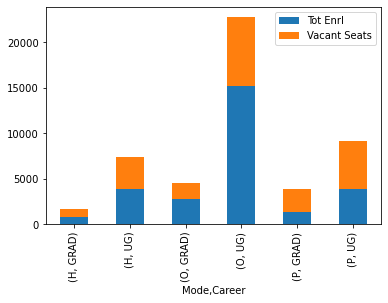

In [202]:
Actual_Erollment_cap.groupby(['Mode','Career']).sum()
Actual_Erollment_cap_vacant = Actual_Erollment_cap.drop(['Enrl Cap'],axis = 1)
Actual_Erollment_cap_vacant.groupby(['Mode','Career']).sum().plot(kind='bar',stacked=True)

## UG Vacant Seats

In [245]:
#Career wise enrollment ratio
Enrl_H = Actual_Erollment_cap[(Actual_Erollment_cap.Mode=='H')& (Actual_Erollment_cap.Career =='UG')]
Enrl_H.drop(['Career','Mode'],axis = 1).style.hide_index()
#Enrl_H.style.hide_index()


Department,Tot Enrl,Enrl Cap,Vacant Seats%
ACC,277,430,0.355814
CIS,777,1135,0.315419
FIN,367,849,0.567727
LAW,40,150,0.733333
MGT,1638,3834,0.572770
MKT,720,985,0.269036


## Vacant Seats : Undergraduate - Hybrid

<AxesSubplot:xlabel='Department'>

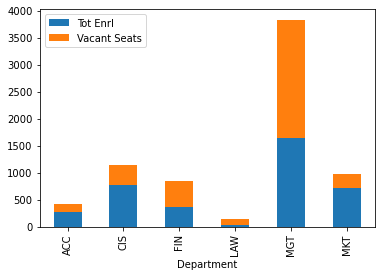

In [156]:
enrl_hybrid =Enrl_H.drop(['Enrl Cap'],axis = 1)
enrl_hybrid.groupby(['Department']).sum().plot(kind='bar',stacked=True)

## Vacant Seats : Undergraduate - Online

In [199]:
Enrl_O = Actual_Erollment_cap[(Actual_Erollment_cap.Mode=='O')& (Actual_Erollment_cap.Career =='UG')]
Enrl_O.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats
24,ACC,4064,5785,1721
25,CIS,1725,2070,345
26,FIN,4867,6661,1794
27,LAW,295,670,375
28,MGT,1939,2596,657
29,MKT,1844,4518,2674
30,RES,473,490,17



## Vacant Seats : Undergraduate - Online

<AxesSubplot:xlabel='Department'>

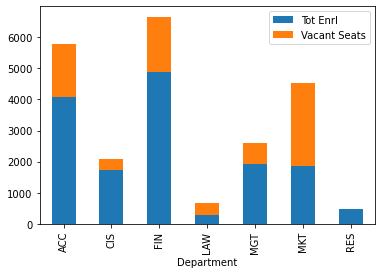

In [158]:
enrl_online = Enrl_O.drop(['Enrl Cap'],axis = 1)
enrl_online.groupby(['Department']).sum().plot(kind='bar',stacked=True)

## Vacant Seats : Undergraduate - in Person

In [197]:
Enrl_P = Actual_Erollment_cap[(Actual_Erollment_cap.Mode=='P')& (Actual_Erollment_cap.Career =='UG')]
Enrl_P.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats
31,ACC,403,717,314
32,CIS,1032,1770,738
33,FIN,668,1302,634
34,LAW,304,1045,741
35,MGT,897,1977,1080
36,MKT,422,1796,1374
37,RES,163,555,392


## Vacant Seats : Undergraduate - in Person

<AxesSubplot:xlabel='Department'>

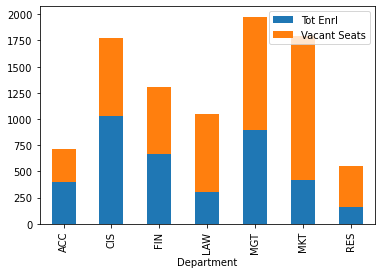

In [198]:
enrl_person = Enrl_P.drop(['Enrl Cap'],axis = 1)
enrl_person.groupby(['Department']).sum().plot(kind='bar',stacked=True)

## Vacant Seats - Graduate Courses

In [187]:
Enrl_G = Actual_Erollment_cap[(Actual_Erollment_cap.Career =='GRAD')]
#Enrl_G
Enrl_G.groupby(['Mode', 'Department']).sum()



Tot Enrl  Enrl Cap  Vacant Seats
Mode Department                                  
H    CIS              219       695           476
     FIN               46       110            64
     MGT              126       235           109
     MKT              347       650           303
O    ACC              468       883           415
     CIS              948      1448           500
     FIN              767      1028           261
     LAW               31       110            79
     MGT              294       455           161
     MKT              253       474           221
     RES               49       120            71
P    ACC              291       871           580
     CIS              388      1180           792
     FIN              170       260            90
     LAW               65       285           220
     MGT              130       300           170
     MKT              290       870           580
     RES               28        95            67

## Vacant Seats: Grad - Person

In [191]:
Enrl_GP = Enrl_G[(Enrl_G.Mode=='P')]
Enrl_GP.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats
11,ACC,291,871,580
12,CIS,388,1180,792
13,FIN,170,260,90
14,LAW,65,285,220
15,MGT,130,300,170
16,MKT,290,870,580
17,RES,28,95,67


<AxesSubplot:xlabel='Department'>

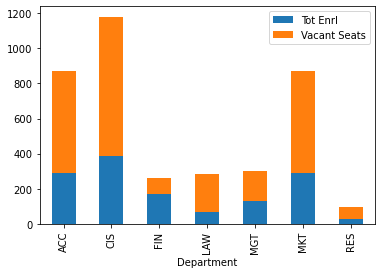

In [192]:
enrl_gperson = Enrl_GP.drop(['Enrl Cap'],axis = 1)
enrl_gperson.groupby(['Department']).sum().plot(kind='bar',stacked=True)

## Vacant Seats: Grad - Online

In [189]:
Enrl_GO = Enrl_G[(Enrl_G.Mode=='O')]
Enrl_GO.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats
4,ACC,468,883,415
5,CIS,948,1448,500
6,FIN,767,1028,261
7,LAW,31,110,79
8,MGT,294,455,161
9,MKT,253,474,221
10,RES,49,120,71


<AxesSubplot:xlabel='Department'>

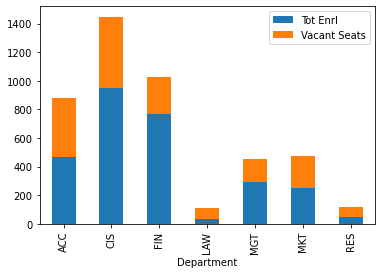

In [190]:
enrl_gonline = Enrl_GO.drop(['Enrl Cap'],axis = 1)
enrl_gonline.groupby(['Department']).sum().plot(kind='bar',stacked=True)

## Vacant Seats: Grad - Hybrid

In [195]:
Enrl_GH = Enrl_G[(Enrl_G.Mode=='H')]
Enrl_GH.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats
0,CIS,219,695,476
1,FIN,46,110,64
2,MGT,126,235,109
3,MKT,347,650,303


<AxesSubplot:xlabel='Department'>

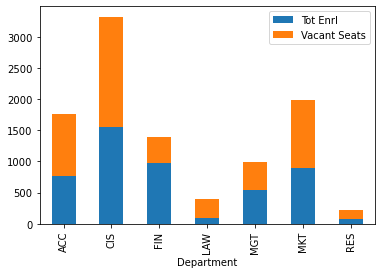

In [196]:
enrl_ghybrid = Enrl_G.drop(['Enrl Cap'],axis = 1)
enrl_ghybrid.groupby(['Department']).sum().plot(kind='bar',stacked=True)

## Vacant Seat Distribution

In [250]:
Actual_Erollment_cap['Vacant Seats%'] = ((Actual_Erollment_cap['Enrl Cap']-Actual_Erollment_cap['Tot Enrl'])/Actual_Erollment_cap['Enrl Cap'])*100
Actual_Erollment_cap_1 = Actual_Erollment_cap.groupby( [ "Career", "Department","Mode"] )["Tot Enrl","Enrl Cap"].agg('sum').reset_index()
Actual_Erollment_cap_1['Vacant Seats'] = (Actual_Erollment_cap_1['Enrl Cap']-Actual_Erollment_cap_1['Tot Enrl'])
Actual_Erollment_cap_1['Vacant Seats%'] = (Actual_Erollment_cap_1['Enrl Cap']-Actual_Erollment_cap_1['Tot Enrl'])/Actual_Erollment_cap_1['Enrl Cap']
Actual_Erollment_cap_1

,Career,Department,Mode,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
0,GRAD,ACC,O,468,883,415,0.469989
1,GRAD,ACC,P,291,871,580,0.665901
2,GRAD,CIS,H,219,695,476,0.684892
3,GRAD,CIS,O,948,1448,500,0.345304
4,GRAD,CIS,P,388,1180,792,0.671186
5,GRAD,FIN,H,46,110,64,0.581818
6,GRAD,FIN,O,767,1028,261,0.253891
7,GRAD,FIN,P,170,260,90,0.346154
8,GRAD,LAW,O,31,110,79,0.718182
9,GRAD,LAW,P,65,285,220,0.771930


In [220]:
Actual_Erollment_cap_2 = Actual_Erollment_cap_1.drop(['Enrl Cap', 'Tot Enrl'],axis = 1)
Actual_Erollment_cap_2

,Career,Department,Mode,Vacant Seats,Vacant Seats%
0,GRAD,ACC,O,415,0.469989
1,GRAD,ACC,P,580,0.665901
2,GRAD,CIS,H,476,0.684892
3,GRAD,CIS,O,500,0.345304
4,GRAD,CIS,P,792,0.671186
5,GRAD,FIN,H,64,0.581818
6,GRAD,FIN,O,261,0.253891
7,GRAD,FIN,P,90,0.346154
8,GRAD,LAW,O,79,0.718182
9,GRAD,LAW,P,220,0.771930


## Vacant Seats Distribution - in Person/UG


In [232]:
#Filtered for the mode and career 
#Career and mode dropped for making the table look clean

Enrl_P_v = Actual_Erollment_cap_1[(Actual_Erollment_cap_1.Mode=='P')& (Actual_Erollment_cap_1.Career =='UG')]
Enrl_P_v.drop(['Career','Mode'],axis = 1)


,Department,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
20,ACC,403,717,314,0.437936
23,CIS,1032,1770,738,0.416949
26,FIN,668,1302,634,0.486943
29,LAW,304,1045,741,0.709091
32,MGT,897,1977,1080,0.546282
35,MKT,422,1796,1374,0.765033
37,RES,163,555,392,0.706306


## Vacant Seats Distribution - Online/UG

In [233]:
Enrl_O_v = Actual_Erollment_cap_1[(Actual_Erollment_cap_1.Mode=='O')& (Actual_Erollment_cap_1.Career =='UG')]
Enrl_O_v.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
19,ACC,4064,5785,1721,0.297494
22,CIS,1725,2070,345,0.166667
25,FIN,4867,6661,1794,0.269329
28,LAW,295,670,375,0.559701
31,MGT,1939,2596,657,0.253082
34,MKT,1844,4518,2674,0.591855
36,RES,473,490,17,0.034694


## Vacant Seats Distribution - Hybrid/UG

In [234]:
Enrl_H_v = Actual_Erollment_cap_1[(Actual_Erollment_cap_1.Mode=='H')& (Actual_Erollment_cap_1.Career =='UG')]
Enrl_H_v.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
18,ACC,277,430,153,0.355814
21,CIS,777,1135,358,0.315419
24,FIN,367,849,482,0.567727
27,LAW,40,150,110,0.733333
30,MGT,1638,3834,2196,0.572770
33,MKT,720,985,265,0.269036


## Vacant Seats Distribution - Hybrid/Grad

In [235]:
Enrl_H_v_g = Actual_Erollment_cap_1[(Actual_Erollment_cap_1.Mode=='H')& (Actual_Erollment_cap_1.Career =='GRAD')]
Enrl_H_v_g.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
2,CIS,219,695,476,0.684892
5,FIN,46,110,64,0.581818
10,MGT,126,235,109,0.463830
13,MKT,347,650,303,0.466154


## Vacant Seats Distribution - Online/Grad

In [236]:
Enrl_O_v_g = Actual_Erollment_cap_1[(Actual_Erollment_cap_1.Mode=='O')& (Actual_Erollment_cap_1.Career =='GRAD')]
Enrl_O_v_g.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
0,ACC,468,883,415,0.469989
3,CIS,948,1448,500,0.345304
6,FIN,767,1028,261,0.253891
8,LAW,31,110,79,0.718182
11,MGT,294,455,161,0.353846
14,MKT,253,474,221,0.466245
16,RES,49,120,71,0.591667


## Vacant Seats Distribution - Person/Grad

In [237]:
Enrl_P_v_g = Actual_Erollment_cap_1[(Actual_Erollment_cap_1.Mode=='P')& (Actual_Erollment_cap_1.Career =='GRAD')]
Enrl_P_v_g.drop(['Career','Mode'],axis = 1)

,Department,Tot Enrl,Enrl Cap,Vacant Seats,Vacant Seats%
1,ACC,291,871,580,0.665901
4,CIS,388,1180,792,0.671186
7,FIN,170,260,90,0.346154
9,LAW,65,285,220,0.771930
12,MGT,130,300,170,0.566667
15,MKT,290,870,580,0.666667
17,RES,28,95,67,0.705263
